In [ ]:
!wget https://www.dropbox.com/s/yu591xskdlr04h4/image_data.zip?dl=0
!unzip /content/image_data.zip?dl=0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread, imshow 
import os
import shutil

from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential

In [2]:
TRAIN_ROOT_DIR = "/content/images/images/training_set"
DEST = "/content/train/images"

if not os.path.exists(DEST):
  os.makedirs(DEST)
  for dir in os.listdir(TRAIN_ROOT_DIR):
    for img in os.listdir( os.path.join(TRAIN_ROOT_DIR,dir)):
      ORG = os.path.join(TRAIN_ROOT_DIR,dir,img)
      DEST = "/content/train/images"
      try:
        imread(ORG)
        shutil.copy(ORG, DEST)
      except:
        print(f"the image at {ORG} cant be used")

In [3]:
#Number of images in train folder       
len( os.listdir("/content/train/images") )

7721

In [8]:
train_datagen = ImageDataGenerator(rescale= 1/255, 
                                   color_mode= None,
                                   featurewise_center=True, 
                                   rotation_range= 40, 
                                   horizontal_flip= True, 
                                   vertical_flip= True, 
                                   featurewise_std_normalization= True)

train = train_datagen.flow_from_directory("/content/train/", 
                                          target_size=(256,256), 
                                          batch_size=1000, 
                                          shuffle= True)

Found 7721 images belonging to 1 classes.


In [9]:
# to visualize the images in the traing data denerator 

t_img , label = train.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
t_img.shape

(1000, 256, 256, 3)

In [11]:
# function when called will prot the images 

def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  plt.figure(figsize= (5,5))
  for im, l in zip(img_arr,label) :
    
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show() 

In [12]:
# uncomment this to see the images in your batch
#plotImages(t_img, label)

In [13]:
X = []
y = []

In [14]:
for img in t_img:
  try:
    lab = rgb2lab(img)
    X.append(lab[:,:,0])
    y.append(lab[:,:,1:]/128)
  except:
    print('error')

In [15]:
X_train = np.array(X)
X_train = np.expand_dims(X_train , axis = len(X_train.shape))
y_train = np.array(y)

X_train.shape , y_train.shape

((1000, 256, 256, 1), (1000, 256, 256, 2))

In [16]:
# buildinf the model 

#encoder 
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', padding='same', strides=2, input_shape = (256,256,1)))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))

#decoding
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model.add(Conv2D(2,(3,3), activation= LeakyReLU(alpha=0.01) , padding='same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       2

In [20]:
model.compile(optimizer='adam', metrics=['acc'],loss='mse')

In [22]:
model.fit(X_train,y_train, epochs=30, batch_size= 32, steps_per_epoch= X_train.shape[0]//32, verbose= 1)

Epoch 1/30
31/31 [==============================] - 32s 633ms/step - loss: 0.0095 - acc: 0.8048
Epoch 2/30
31/31 [==============================] - 23s 635ms/step - loss: 0.0093 - acc: 0.8053
Epoch 3/30
31/31 [==============================] - 19s 622ms/step - loss: 0.0095 - acc: 0.8052
Epoch 4/30
31/31 [==============================] - 19s 621ms/step - loss: 0.0095 - acc: 0.8034
Epoch 5/30
31/31 [==============================] - 19s 621ms/step - loss: 0.0093 - acc: 0.8161
Epoch 6/30
31/31 [==============================] - 19s 621ms/step - loss: 0.0094 - acc: 0.7944
Epoch 7/30
31/31 [==============================] - 19s 620ms/step - loss: 0.0096 - acc: 0.8069
Epoch 8/30
31/31 [==============================] - 19s 620ms/step - loss: 0.0100 - acc: 0.8028
Epoch 9/30
31/31 [==============================] - 19s 620ms/step - loss: 0.0092 - acc: 0.8075
Epoch 10/30
31/31 [==============================] - 19s 621ms/step - loss: 0.0092 - acc: 0.8009
Epoch 11/30
31/31 [====================

In [23]:
model.save("./bestmodel.h5")

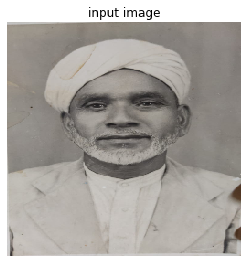

In [24]:
# we need to reshape the image 
img1_color =[]

img = img_to_array(
    load_img("/content/WhatsApp Image 2021-05-22 at 5.19.43 PM.jpeg", target_size= (256,256,3)) ) /255

plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()

In [25]:
img1_color.append(img)

img1_color = rgb2lab(img1_color)[:,:,:,0]

img1_color = img1_color.reshape(img1_color.shape+(1,))

In [26]:
output1 = model.predict(img1_color)
output1 = output1*128

In [27]:
result = np.zeros((256,256,3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]

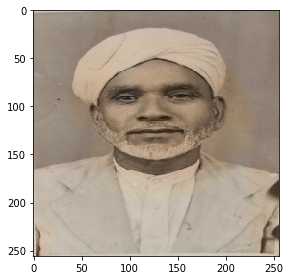

In [28]:
imshow(lab2rgb(result))

##--------------------------------------------------